# Step 2: Image transformations with NumPy and OpenCV
We will now use NumPy and OpenCV to transform an image by applying transformation matrices on homogeneous form.

## 1. Eigen and homogeneous representations
For different values of **t**, *&theta;* and **u**,

use NumPy to define a 2D Euclidean transformation matrix

  $\mathbf{E} = \begin{bmatrix}\mathbf{R} & \mathbf{t} \\\mathbf{0} & 1\end{bmatrix}$

  where

  $\mathbf{R} =
  \begin{bmatrix}
  \cos \theta & -\sin \theta \\
  \sin \theta & \cos \theta
  \end{bmatrix}$

  is the rotation matrix corresponding to a counterclockwise rotation with an angle *&theta;* about the origin, and

  $\mathbf{t} =
  \begin{bmatrix}
  dx \\
  dy \\
  \end{bmatrix}$

  is the translation vector.

Define a pixel

  $\mathbf{u} =
  \begin{bmatrix}
  u \\
  v \\
  \end{bmatrix}$

  and obtain the transformed pixel $\mathbf{u}_{trans}$ by computing the transformation using homogeneous coordinates

$\mathbf{\tilde u}_{trans} = \mathbf{E} \mathbf{\tilde u}$

**Tips**:
You might want to convert between degrees and radians, so see if you can find the appropriate values and functions in NumPy.
Hint: [https://numpy.org/doc/stable/reference/routines.math.html](https://numpy.org/doc/stable/reference/routines.math.html)

In [14]:
import numpy as np

# For convenience, we define two functions for converting a vector to homogeneous coordinates and back
# If you are not at all familiar with the lambda, see e.g.
# https://www.w3schools.com/python/python_lambda.asp
homogeneous = lambda x: np.append(x, [[1]], axis=0)
normalized = lambda x: x[:-1]/x[-1]

# TODO: Translation
t = homogeneous(np.array([[0], [1]]))

# TODO: Rotation
theta = np.radians(180)
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# TODO: Euclidean transformation that rotates and then translates
E = np.hstack((np.vstack((R, np.array([0, 0]))), t))

# TODO: Perform the transformation on a pixel u.
# Hint: What operator is used for matrix multiplication in NumPy?
u = homogeneous(np.array([[20], [20]]))
u_transformed = E @ u

print(f"Euclidean transformation E = \n{E}\n")
print(f"Original pixel u = \n{u}\n")
print(f"Transformed pixel u_transformed = \n{u_transformed}")

Euclidean transformation E = 
[[-1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]

Original pixel u = 
[[20]
 [20]
 [ 1]]

Transformed pixel u_transformed = 
[[-20.]
 [-19.]
 [  1.]]


## 2. Transform images
<img src="img-grid.png" width="500">

We will now use the **E** matrix to transform the image above.

Notice that you can use the grid and protractor to check your transformations.
There are 100 pixels between each grid line, and you can check the rotation by recognizing which protractor line is parallel with the new y-axis.

- Read the image using [cv2.imread()](https://docs.opencv.org/4.5.5/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
- Perform the transformation using [cv2.warpPerspective()](https://docs.opencv.org/4.5.5/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)
- Try different transformations.
- Try the *inverse* transformation (how can you easily compute that?).

Hint: See the OpenCV Python tutorial, [Getting Started with Images](https://docs.opencv.org/4.5.5/db/deb/tutorial_display_image.html) (Click the `Python` button).

[[  -0.17364818   -0.98480775  100.        ]
 [   0.98480775   -0.17364818 -100.        ]
 [   0.            0.            1.        ]]


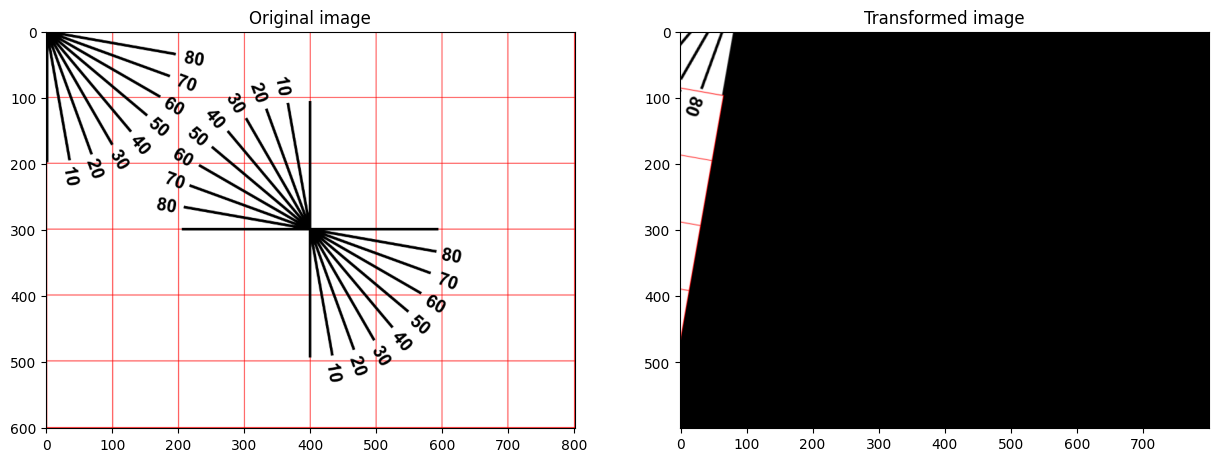

In [66]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

# TODO: Read the image
filename = 'img-grid.png'
img = cv2.imread(filename)

# TODO: Perform transformation on the image

# TODO: Repeat exercise 1 and create the transformation matrix E
homogeneous = lambda x: np.append(x, [[1]], axis=0)
t = homogeneous(np.array([[100], [-100]]))
theta = np.radians(100)
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
E = np.hstack((np.vstack((R, np.array([0, 0]))), t))
print(E)
# img_size must be (cols, rows)
img_size = (800, 600)
img_trans_E = cv2.warpPerspective(img, E, img_size)

# Display the original and the transformed image
axes = plt.subplots(1, 2)[1]
ax1, ax2 = axes
ax1.set_title('Original image')
ax2.set_title('Transformed image')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_trans_E, cv2.COLOR_BGR2RGB))
plt.show()

# TODO: Try different transformations (rotations and translations)


## 3. Composing transformations
Have you noticed that the image is rotated around the upper left corner? Why is it so?

We can rotate around the image center by first translating the origin to the center, rotating and then translate back by performing the opposite translation.
We can compose these transformations to a single transformation by multiplying all corresponding transformation matrices together:

$\mathbf{E}_{composed} = \mathbf{E}_{corner \leftarrow center} \; \mathbf{E}_{rotate} \; \mathbf{E}_{center \leftarrow corner}$

- Rotate the image about its center by computing the composed transformation above.
- Finally, try adding a scaling transformation (zoom) after the rotation. What kind of composed transformation do we obtain then?


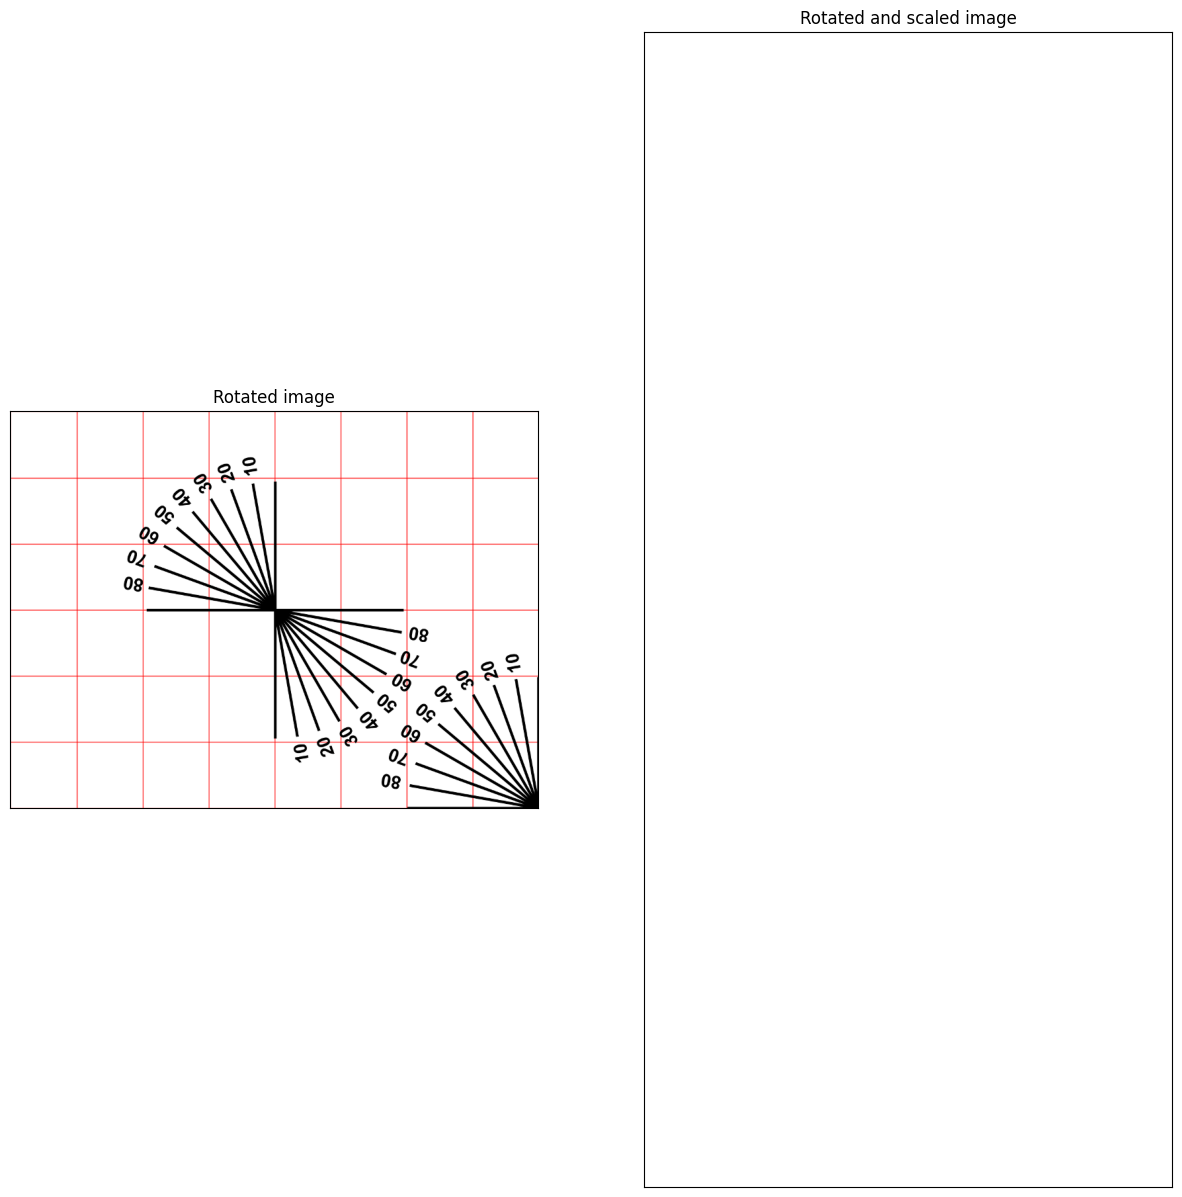

In [89]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

# Todo: Compose transformations to rotate and scale around the centre of the image.

theta = np.radians(180)
T1 = np.array([[1, 0, 400],
               [0, 1, 300],
               [0, 0, 1]]) 
T2 = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta), np.cos(theta), 0],
               [0, 0, 1]])
T3 = np.array([[1, 0, -400],
               [0, 1, -300],
               [0, 0, 1]])
T = T1 @ T2 @ T3
img = cv2.imread(filename)

img_rotated = cv2.warpPerspective(img, T, img_size)
#img_rotated_scaled = None

# Display the transformed and the scaled image
axes = plt.subplots(1, 2)[1]
ax1, ax2 = axes
ax1.set_title('Rotated image')
ax2.set_title('Rotated and scaled image')
ax1.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
#ax2.imshow(cv2.cvtColor(img_rotated_scaled, cv2.COLOR_BGR2RGB))
# remove the x and y ticks
plt.setp(axes, xticks=[], yticks=[])
plt.show()